In [29]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [2]:
train_labels = []
train_samples = []
test_labels = []
test_samples = []

# Example data:
    An experimental drug was tested on individuals from ages 13 to 100 in a clinical trail.
    The trial had 2100 participants. Half were under 65 years old, half were 65 years old or older.
    - Around 95% of patients 65 or older experienced side effects.
    - Around 95% of patients under 65 experienced no side effects.

In [3]:
for i in range (50):
    # The ~5% of younger individual who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The ~5% of older individual who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range (1000):
    # The ~95% of younger individual who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The ~95% of older individual who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
for i in range (50):
    # The ~5% of younger individual who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The ~5% of older individual who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range (1000):
    # The ~95% of younger individual who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The ~95% of older individual who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [5]:
for i in train_samples:
    print(i)

56
91
38
96
45
87
35
98
22
76
64
70
17
97
22
93
21
70
29
74
32
67
43
99
16
91
47
77
52
79
25
78
33
71
13
89
25
91
37
66
57
79
52
71
60
87
18
77
29
90
13
77
34
99
41
91
63
93
47
73
35
73
15
84
60
90
20
71
39
73
52
66
36
69
13
92
50
71
64
74
43
92
45
68
40
76
15
69
37
71
45
84
27
85
32
77
62
90
42
87
27
72
39
99
33
79
52
68
53
96
19
79
52
72
16
75
53
83
49
65
17
70
44
77
21
81
58
72
43
98
61
98
54
87
40
81
51
93
56
67
49
86
40
90
45
79
58
68
37
100
33
95
20
74
53
90
47
69
38
70
56
67
62
68
15
82
13
96
39
71
25
76
47
67
34
80
25
77
34
81
23
84
46
70
52
67
45
96
57
65
55
69
20
76
14
77
28
75
19
100
47
77
22
78
46
82
13
90
17
65
50
92
26
93
37
78
43
82
27
76
18
83
16
86
50
72
51
73
54
71
24
88
57
67
34
87
17
87
23
74
49
65
50
99
16
98
32
96
42
73
16
89
45
96
58
98
25
78
36
95
55
82
63
69
39
100
43
95
56
90
13
75
33
84
62
69
32
67
64
95
60
70
44
66
13
88
57
87
25
66
34
82
49
81
39
88
40
95
41
75
45
70
53
87
16
98
56
74
48
94
62
95
47
72
27
72
49
93
27
85
21
84
52
91
33
68
55
86
50
75
25
92
1

In [6]:
for i in train_labels:
    print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


## Transfer to numpy array

In [7]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels,train_samples = shuffle(train_labels,train_samples)

In [8]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels,test_samples = shuffle(test_labels,test_samples)

## Normalize/Standarlize

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))#rescale
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1)) #transform 1D to 2D
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1)) #transform 1D to 2D

## Simple tf.keras Squential Model

In [10]:
model = Sequential ([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x=scaled_train_samples,
          y=train_labels,
          batch_size=10,
          epochs=30,
          shuffle=True,
          verbose=2)

Train on 2100 samples
Epoch 1/30
2100/2100 - 0s - loss: 0.6952 - accuracy: 0.4386
Epoch 2/30
2100/2100 - 0s - loss: 0.6589 - accuracy: 0.6157
Epoch 3/30
2100/2100 - 0s - loss: 0.6207 - accuracy: 0.7100
Epoch 4/30
2100/2100 - 0s - loss: 0.5840 - accuracy: 0.7552
Epoch 5/30
2100/2100 - 0s - loss: 0.5475 - accuracy: 0.8000
Epoch 6/30
2100/2100 - 0s - loss: 0.5111 - accuracy: 0.8352
Epoch 7/30
2100/2100 - 0s - loss: 0.4757 - accuracy: 0.8490
Epoch 8/30
2100/2100 - 0s - loss: 0.4430 - accuracy: 0.8724
Epoch 9/30
2100/2100 - 0s - loss: 0.4131 - accuracy: 0.8738
Epoch 10/30
2100/2100 - 0s - loss: 0.3862 - accuracy: 0.8957
Epoch 11/30
2100/2100 - 0s - loss: 0.3627 - accuracy: 0.8986
Epoch 12/30
2100/2100 - 0s - loss: 0.3436 - accuracy: 0.9100
Epoch 13/30
2100/2100 - 0s - loss: 0.3276 - accuracy: 0.9119
Epoch 14/30
2100/2100 - 0s - loss: 0.3142 - accuracy: 0.9176
Epoch 15/30
2100/2100 - 0s - loss: 0.3031 - accuracy: 0.9162
Epoch 16/30
2100/2100 - 0s - loss: 0.2946 - accuracy: 0.9286
Epoch 17/30

## With Validation Set

In [14]:
model.fit(x=scaled_train_samples,
          y=train_labels,
          validation_split=0.1,
          batch_size=10,
          epochs=30,
          shuffle=True,
          verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/30
1890/1890 - 0s - loss: 0.2562 - accuracy: 0.9439 - val_loss: 0.2442 - val_accuracy: 0.9381
Epoch 2/30
1890/1890 - 0s - loss: 0.2551 - accuracy: 0.9418 - val_loss: 0.2439 - val_accuracy: 0.9381
Epoch 3/30
1890/1890 - 0s - loss: 0.2544 - accuracy: 0.9455 - val_loss: 0.2434 - val_accuracy: 0.9381
Epoch 4/30
1890/1890 - 0s - loss: 0.2538 - accuracy: 0.9418 - val_loss: 0.2432 - val_accuracy: 0.9381
Epoch 5/30
1890/1890 - 0s - loss: 0.2534 - accuracy: 0.9434 - val_loss: 0.2428 - val_accuracy: 0.9381
Epoch 6/30
1890/1890 - 0s - loss: 0.2525 - accuracy: 0.9444 - val_loss: 0.2426 - val_accuracy: 0.9381
Epoch 7/30
1890/1890 - 0s - loss: 0.2517 - accuracy: 0.9407 - val_loss: 0.2425 - val_accuracy: 0.9429
Epoch 8/30
1890/1890 - 0s - loss: 0.2515 - accuracy: 0.9444 - val_loss: 0.2419 - val_accuracy: 0.9381
Epoch 9/30
1890/1890 - 0s - loss: 0.2507 - accuracy: 0.9444 - val_loss: 0.2416 - val_accuracy: 0.9381
Epoch 10/30
1890/1890 - 0s - loss: 

## Predictions

In [15]:
predictions = model.predict(x=scaled_test_samples,
                           batch_size=10,
                           verbose=0)

In [16]:
for i in predictions:
    print(i)

[0.03118569 0.9688144 ]
[0.9759926  0.02400733]
[0.07744832 0.92255163]
[0.9738166  0.02618341]
[0.82398903 0.176011  ]
[0.2075765 0.7924235]
[0.04941502 0.95058495]
[0.9719438  0.02805617]
[0.0247044 0.9752956]
[0.08335202 0.91664803]
[0.0247044 0.9752956]
[0.9771559  0.02284412]
[0.9744572 0.0255428]
[0.01806965 0.9819303 ]
[0.01806965 0.9819303 ]
[0.9733696  0.02663041]
[0.9756929  0.02430704]
[0.47403926 0.52596074]
[0.01544278 0.9845573 ]
[0.05748328 0.94251674]
[0.05330527 0.94669473]
[0.9760089  0.02399109]
[0.9544929  0.04550709]
[0.11311887 0.8868812 ]
[0.01806965 0.9819303 ]
[0.5763848 0.4236152]
[0.3738295  0.62617046]
[0.03369167 0.96630836]
[0.03639147 0.9636085 ]
[0.9762888  0.02371122]
[0.01544278 0.9845573 ]
[0.82398903 0.176011  ]
[0.14790992 0.8520901 ]
[0.9617639  0.03823606]
[0.9774445  0.02255543]
[0.8924512  0.10754877]
[0.3738295  0.62617046]
[0.9780894  0.02191061]
[0.9782527  0.02174723]
[0.01954295 0.980457  ]
[0.06196731 0.9380327 ]
[0.01954295 0.980457  ]
[0

[0.0247044 0.9752956]
[0.0247044 0.9752956]
[0.04242823 0.95757174]
[0.04941502 0.95058495]
[0.14790992 0.8520901 ]
[0.9774445  0.02255543]
[0.9587568  0.04124323]
[0.9744572 0.0255428]
[0.96854055 0.03145951]
[0.05748328 0.94251674]
[0.97472286 0.02527721]
[0.9768703  0.02312965]
[0.97772205 0.02227788]
[0.9666922  0.03330779]
[0.97799635 0.02200369]
[0.4231442  0.57685584]
[0.9738166  0.02618341]
[0.04579494 0.9542051 ]
[0.9487976  0.05120238]
[0.11311887 0.8868812 ]
[0.07744832 0.92255163]
[0.03929884 0.96070117]
[0.05748328 0.94251674]
[0.3270043 0.6729957]
[0.08335202 0.91664803]
[0.9780894  0.02191061]
[0.9783718  0.02162817]
[0.07192997 0.92807007]
[0.9719438  0.02805617]
[0.05748328 0.94251674]
[0.3270043 0.6729957]
[0.17573139 0.8242686 ]
[0.9719438  0.02805617]
[0.03369167 0.96630836]
[0.01806965 0.9819303 ]
[0.5763848 0.4236152]
[0.0247044 0.9752956]
[0.9666922  0.03330779]
[0.01544278 0.9845573 ]
[0.06677636 0.9332236 ]
[0.97799635 0.02200369]
[0.97477174 0.02522824]
[0.022

In [18]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [19]:
for i in rounded_predictions:
    print(i)

1
0
1
0
0
1
1
0
1
1
1
0
0
1
1
0
0
1
1
1
1
0
0
1
1
0
1
1
1
0
1
0
1
0
0
0
1
0
0
1
1
1
0
1
1
0
1
1
0
1
1
1
1
1
1
0
1
1
1
0
0
0
0
0
1
0
1
0
1
0
0
1
0
1
1
1
1
0
1
0
1
1
1
0
0
1
1
0
0
1
0
0
0
1
0
1
0
1
1
0
1
0
0
1
0
0
1
1
1
0
1
0
1
1
0
1
1
1
1
0
0
1
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
1
0
1
1
0
1
1
1
0
1
0
1
1
0
1
1
0
1
0
0
1
1
0
0
1
0
1
0
0
1
0
1
0
1
0
1
0
0
0
0
1
0
1
0
1
1
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
1
0
1
0
0
0
1
1
0
0
1
1
0
1
0
0
1
0
0
1
0
0
1
1
1
1
1
0
0
0
1
1
1
0
0
1
0
1
0
1
0
0
0
1
1
1
0
0
0
1
0
1
1
0
0
0
0
0
1
0
0
1
1
1
0
1
1
1
0
1
1
1
1
0
0
1
1
1
0
0
0
0
1
0
0
1
0
0
1
1
0
1
1
1
1
0
1
0
0
1
0
0
1
0
0
0
1
1
1
1
1
1
1
1
0
1
0
0
1
1
1
0
1
0
1
1
0
0
0
0
1
1
0
0
0
0
0
1
1
1
1
1
0
1
1
0
1
0
1
0
0
0
0
1
1
1
1
1
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
1
0
0
1
1
0
1
0
0
1
1
0
0
1
1
0
1
1
0
0
1
1
1
1
1
0
1
0
1
1
1
0
0
0
0
0
0
1
0
0
1
1
0
1
0
1
1
1
1
1
0
0
0
1
1
0
1
0
0
1
1
0
1
1
1
0
1
0
1
1
1
1
0
0
0
1
0
1
1
0
1
0
1
0
1
0
1
1
0
1
0
1
0
1
1
0
0
0
0
0
1
1
1
0
1
1
1
0
0
1
1
1
0
1
0
1
0
1
0
0
1
0
0


## Confusion Matrix

In [23]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [25]:
cm = confusion_matrix(y_true=test_labels,
                     y_pred=rounded_predictions)

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 979   71]
 [  48 1002]]


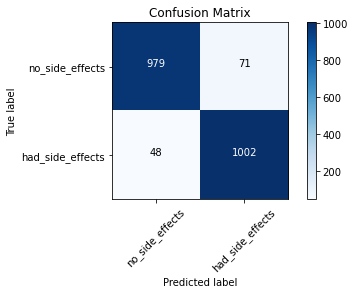

In [32]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Save and Load a Model

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


###  1. model.save()

In [40]:
#Check first to see if file exists already.
#If not, model is saved to disk.
import os.path
if os.path.isfile('L1-medical_trial_model.h5') is False:
    model.save('L1-medical_trial_model.h5')

This save function saves:
- The architecture of the model, allowing to re-create the model.
- The weights of the model.
- The training configuration (loss, optimizer).
- The state of the optimizer, allowing to resume training exactly where you left off.

### 2. model.load()

In [41]:
from tensorflow.keras.models import load_model

In [43]:
new_model = load_model('L1-medical_trial_model.h5')

In [44]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 3. model.to_json()

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [45]:
# save as JSON
json_string = model.to_json()

#save as YAML
# yaml_string = model.to_yaml()

In [46]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dens

In [49]:
# model reconstruction from JSON
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tensorflow.keras.models import model_from_yaml
# model_architecture = model_from_yaml(yaml_string)


In [50]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 4. model.save_weights()

If you only need to save the weights of a model, you can use the following function save the weights only.

In [51]:
#Check first to see if file exists already.
#If not, model is saved to disk.
import os.path
if os.path.isfile('L1-my_model_weights.h5') is False:
    model.save('L1-my_model_weights.h5')

In [52]:
model2 = Sequential ([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [53]:
model2.load_weights('L1-my_model_weights.h5')

In [54]:
model2.get_weights()

[array([[-0.09941408,  0.7347855 ,  0.69515264,  0.6096846 ,  0.51404107,
          0.2097154 ,  0.4582317 ,  0.0922009 ,  0.6185103 , -0.36251068,
         -0.18116236,  0.6215493 ,  0.736792  , -0.5252516 ,  0.18742284,
          0.61109906]], dtype=float32),
 array([ 0.        , -0.19597057, -0.14995681, -0.08320598, -0.22760305,
        -0.10262467,  0.13557753,  0.20688036, -0.15741518,  0.        ,
         0.        , -0.26013815, -0.15075302,  0.        ,  0.23503788,
        -0.23457037], dtype=float32),
 array([[ 1.12556010e-01,  2.61724740e-01,  3.01940709e-01,
         -4.55221236e-02, -3.52632642e-01,  1.81010455e-01,
         -1.33999586e-01, -2.91603208e-02,  5.78336418e-02,
          1.19157583e-01, -2.61530876e-01,  1.13312125e-01,
          3.52914423e-01, -8.80039632e-02,  2.43619591e-01,
          3.72122228e-02,  1.01380616e-01,  3.25431257e-01,
          3.13423067e-01,  5.04454076e-02,  3.28439027e-01,
         -1.32974744e-01,  1.46818548e-01,  1.05868846e-01,
 